# Final Seasonality Analysis and Strategic Insights (Cabo Frio, 2015-2024)

Following the collection of national data (Notebook 1), municipal filtering (Notebook 2), and the final consolidation of the ten-year Cabo Frio dataset (Notebook 3), this notebook performs the Descriptive Seasonality and Temporal Trend Analysis of dengue cases.

We will use advanced visualizations (Heatmap and Annual Comparison Curves) to identify not only the typical seasonal pattern but also the anomalies in the timing and propagation speed of the major epidemics (2019 and 2024). This analysis aims to generate critical strategic insights for municipal epidemiological surveillance.

---

### Importing Required Libraries

In [4]:
import pandas as pd                # Data Manipulation
import seaborn as sns              # Advanced Visualizations  
import matplotlib.pyplot as plt    # Plotting Graphs
import os                          # File Path Management
import sys                         # System-Specific Parameters and Functions

### Setup and Variables

In [5]:
FINAL_FILE = 'DENGCF10y.csv'
PROCESSED_DIR = '../data/processed/dengue' 

FILE_PATH = os.path.join(PROCESSED_DIR, FINAL_FILE)

# Analysis period
START_YEAR = 2015
END_YEAR = 2024

DATE_COL = 'DT_SIN_PRI'

### Data Loading and Preparation

The first step is to load the consolidated dataset and ensure correct typing of the date columns to allow the extraction of Year and Month, which are essential for seasonality analysis.

In [6]:
try:
    df = pd.read_csv(FILE_PATH, sep=';', encoding='utf-8')
except FileNotFoundError:
    print(f"Error: The file '{FINAL_FILE}' was not found in {PROCESSED_DIR}. Check the path.")
    sys.exit(1)

# Ensures the date column is of datetime type
df[DATE_COL] = pd.to_datetime(
    df[DATE_COL], 
    errors='coerce' # Converts invalid data to NaT
)
# Removes rows without a valid date
df_valid_dates = df.dropna(subset=[DATE_COL]).copy()

# Extracts Year and Month
df_valid_dates['ANO'] = df_valid_dates[DATE_COL].dt.year
df_valid_dates['MES'] = df_valid_dates[DATE_COL].dt.month

# Filters the DataFrame for the exact period (2015 to 2024)
filtro_anos = (df_valid_dates['ANO'] >= START_YEAR) & (df_valid_dates['ANO'] <= END_YEAR)
df_filtered = df_valid_dates[filtro_anos]

# Month names mapping for better readability in visualizations
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Creating a DataFrame for Seasonality Analysis with counts of cases per Year and Month
seasonality_df = (
    df_filtered.groupby(['ANO', 'MES'])
    .size()
    .reset_index(name='NUM_CASOS')
)

## Generation of Strategic Visualizations
Next, we generate the four key charts that will form the visual basis of our final analysis.

---

### Figure 1: Typical Seasonal Pattern (Monthly Average)
This chart establishes the average monthly risk, filtering out "noise" from annual variations.

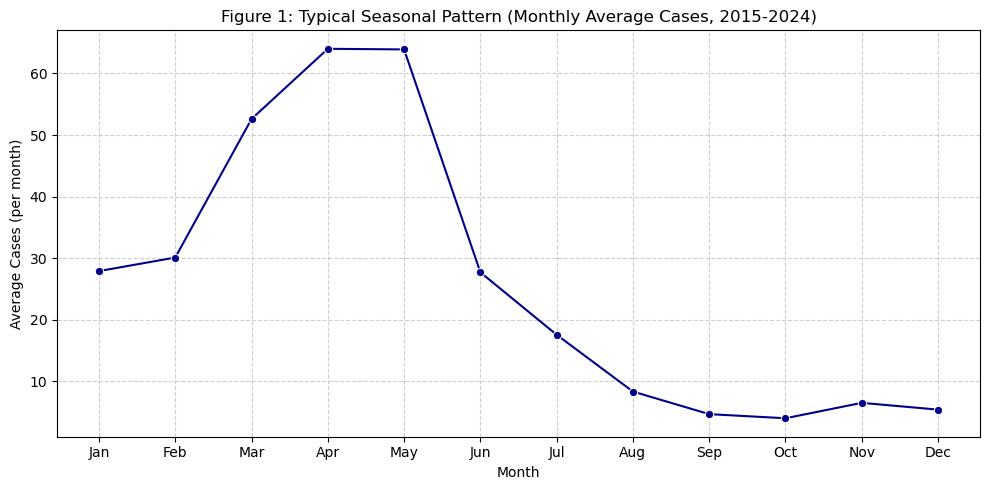

In [7]:
seasonality_mean = (
    seasonality_df.groupby('MES')['NUM_CASOS']
    .mean()
    .reset_index(name='MEDIA_CASOS')
)
seasonality_mean['MONTH_NAME'] = seasonality_mean['MES'].map(month_names.get)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=seasonality_mean, 
    x='MONTH_NAME', 
    y='MEDIA_CASOS', 
    marker='o',
    color='darkblue'
)
plt.title(f'Figure 1: Typical Seasonal Pattern (Monthly Average Cases, {START_YEAR}-{END_YEAR})', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Average Cases (per month)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

--- 

### Figure 2: Seasonality Heatmap
Visualizes the density and magnitude of cases by Year and Month.

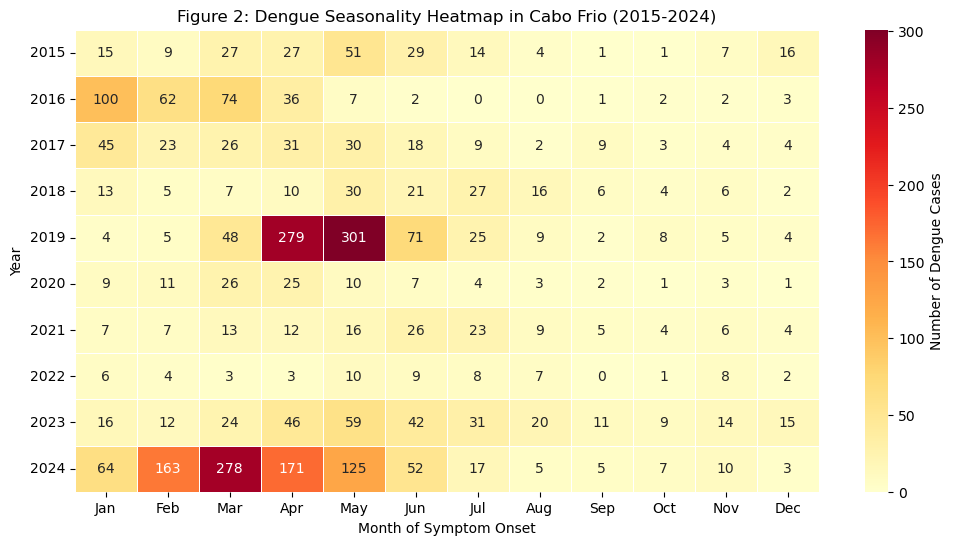

In [8]:
seasonality_pivot = seasonality_df.pivot(
    index='ANO', 
    columns='MES', 
    values='NUM_CASOS'
).fillna(0)
seasonality_pivot.columns = seasonality_pivot.columns.map(month_names.get)

plt.figure(figsize=(12, 6))
sns.heatmap(
    seasonality_pivot.astype(int),
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=.5,
    cbar_kws={'label': 'Number of Dengue Cases'}
)
plt.title(f'Figure 2: Dengue Seasonality Heatmap in Cabo Frio ({START_YEAR}-{END_YEAR})', fontsize=12)
plt.xlabel('Month of Symptom Onset')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.show()

---
### Figure 3: Full Temporal Evolution (Time Series)
Shows the long-term trend and epidemic peaks.

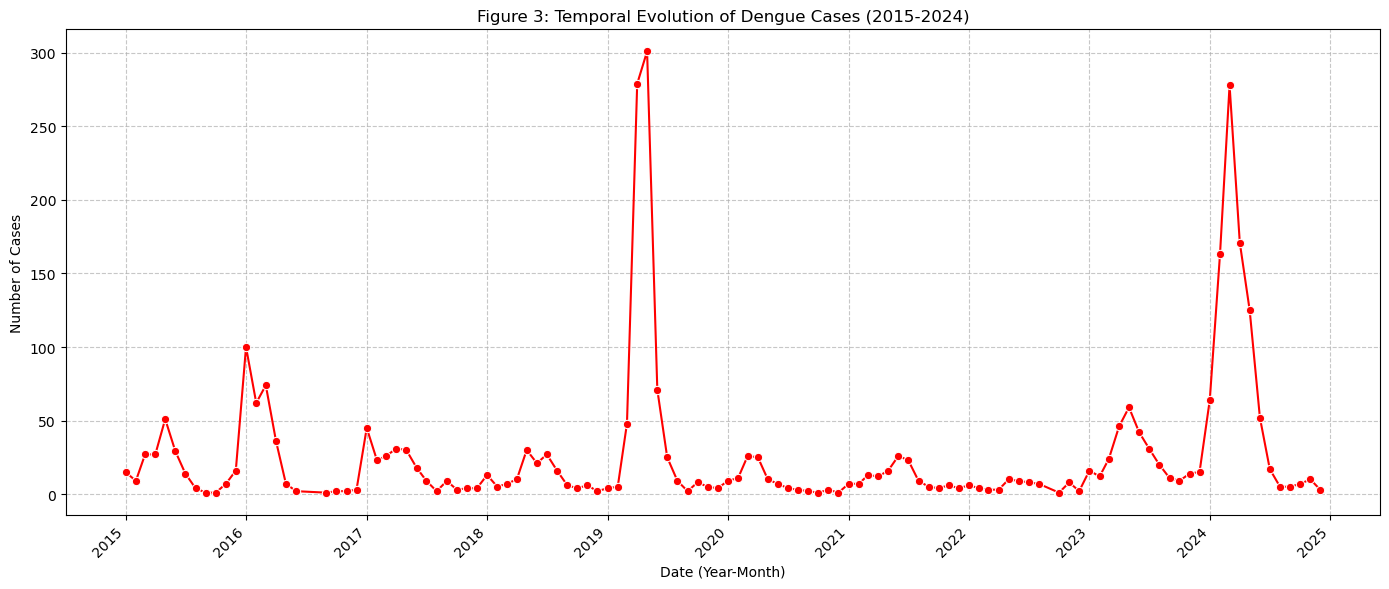

In [9]:
df_time_series = seasonality_df.copy()
df_time_series['YEAR_MONTH'] = pd.to_datetime(
    df_time_series['ANO'].astype(str) + '-' + df_time_series['MES'].astype(str) + '-01'
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_time_series, 
    x='YEAR_MONTH', 
    y='NUM_CASOS', 
    marker='o',
    linestyle='-',
    color='red'
)

plt.title(f'Figure 3: Temporal Evolution of Dengue Cases ({START_YEAR}-{END_YEAR})', fontsize=12)
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
### Figure 4: Annual Comparison Curve (Strategic Insights)
The most critical graph for comparing the speed and timing of outbreaks.

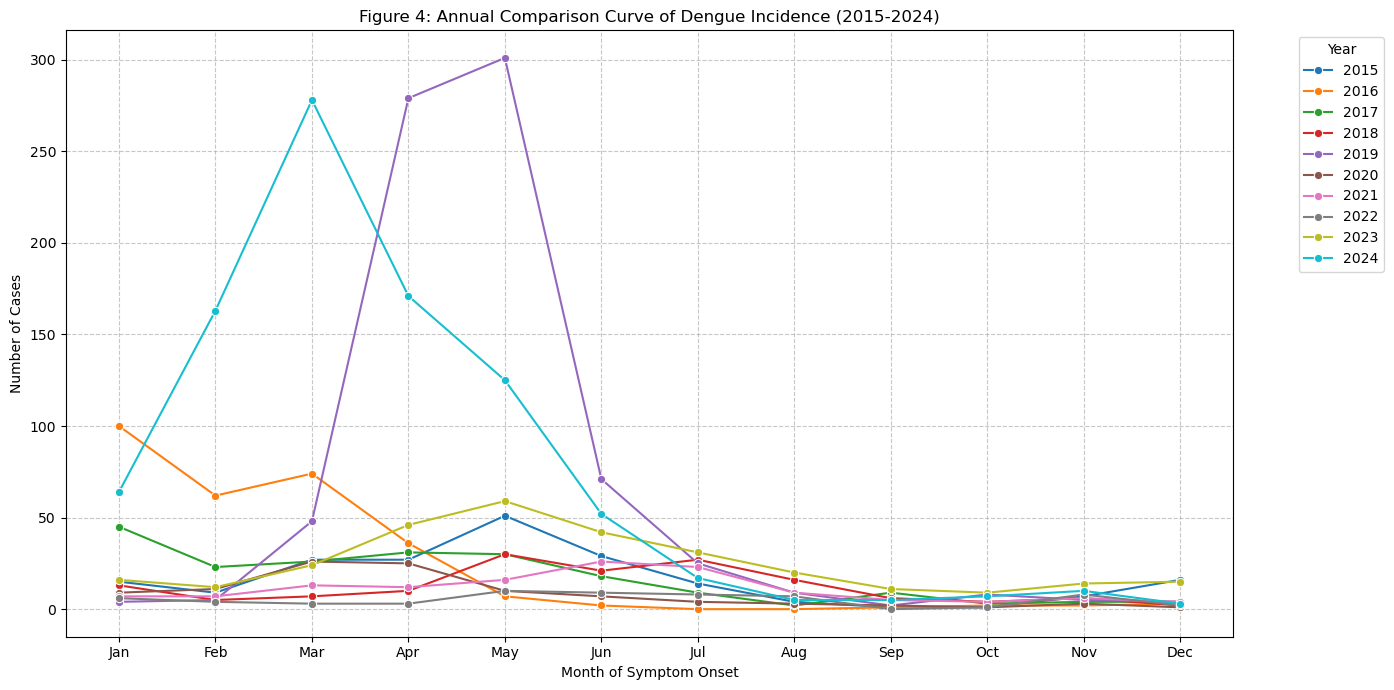

In [10]:
seasonality_by_year = seasonality_df.pivot(
    index='MES', 
    columns='ANO', 
    values='NUM_CASOS'
).fillna(0).astype(int)

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=seasonality_by_year, 
    dashes=False,
    marker='o'
)

plt.title(f'Figure 4: Annual Comparison Curve of Dengue Incidence ({START_YEAR}-{END_YEAR})', fontsize=12)
plt.xlabel('Month of Symptom Onset')
plt.ylabel('Number of Cases')
month_names_list = [month_names.get(i) for i in range(1, 13)]
plt.xticks(ticks=range(1, 13), labels=month_names_list)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---
## Conclusion and Analytical Next Steps
#### The visual analysis of Figures 1, 2, 3, and 4 yields high-value strategic conclusions:
* Prolonged Seasonality (Figures 1 & 2): The maximum risk does not end after Carnival. The peak extends from March to May, indicating that vector control and health education efforts must be sustained and intensified throughout the early Autumn period.

#### 2019 vs. 2024 Contrast (Figure 4):
* *2024 (Speed):* The outbreak was the earliest and fastest (peaking in March), requiring surveillance to be proactively activated in December/January to prevent transmission from reaching maximum summer velocity.
* *2019 (Late Magnitude):* The historical peak in May suggests a strong influence of population susceptibility or the reintroduction of a virulent serotype (e.g., DENV-2), which propagated even as climatic factors were declining. This emphasizes the need for sustained control well into the off-peak season.